<a href="https://colab.research.google.com/github/alscop/ESAA-25-2/blob/main/YB_1010_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**오차 행렬(혼동 행렬) 생성**

In [2]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[337,  20],
       [ 30, 182]])

**정확도의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

정확도(Accuracy): 전체 샘플 중 맞게 예측한 비율  
정답 예측 개수 / 전체 데이터 개수



In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.9121265377855887

정확도가 약 91.2%다. 전체 샘플 중 약 91.2%를 모델이 맞게 예측한 것이다.

**정밀도의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

정밀도(Precision): 양성으로 예측한 것 중 실제 양성인 비율
TP / TP + FP

TP: 실제 악성, 악성으로 예측됨(예측결과 맞음)  
FP: 실제 양성, 악성으로 예측됨(예측결과 틀림)


In [5]:
from sklearn.metrics import precision_score
precision_score(y,y_pred)

0.900990099009901

정밀도가 약 0.901. 모델이 악성이라고 예측했을 때, 그 중 실제로 악성일 확률이 90%정도라는 뜻.

**재현율의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

재현율(Recall) (민감도): 실제 양성 중 양성으로 올바르게 예측한 비율

TP / TP+FN

재현율이 높을수록 악성을 제대로 판단한다는 뜻.

In [6]:
from sklearn.metrics import recall_score
recall_score(y, y_pred)

0.8584905660377359

재현율 약 0.8585로, 실제 악성 샘플 중 약 86%는 악성으로 올바르게 감지했으나, 약 14%는 악성임에도 양성이라고 잘못 판단해 놓쳤다는 뜻이다.

**F1 score의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

F1 점수(F1 Score): 정밀도와 재현율의 조화 평균

정밀도와 재현율을 결합한 지표.  
정밀도와 재현율이 어느 한 쪽으로 치우치지 않을 때 상대적으로 높은 값을 가진다.

2 x (precision x recall)/(precision + recall)



In [7]:
from sklearn.metrics import f1_score
f1_score(y, y_pred)

0.8792270531400966

F1 score가 약 0.8792다. 모델이 악성, 양성을 잘 구분하며 신뢰할 만한 예측 결과를 제공한다.

**예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.**

In [8]:
from sklearn.preprocessing import Binarizer

pred_proba = model_lor.predict_proba(X)
pred_proba1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=0.1)
y_pred2 = binarizer.transform(pred_proba1)

In [10]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
confusion_matrix(y,y_pred2)  # 혼동행렬
accuracy_score(y, y_pred2) # 정확도
precision_score(y,y_pred2) # 정밀도
recall_score(y,y_pred2) # 재현율
f1_score(y, y_pred2) # f1 score

0.8110236220472441

**ROC 곡선 시각화**

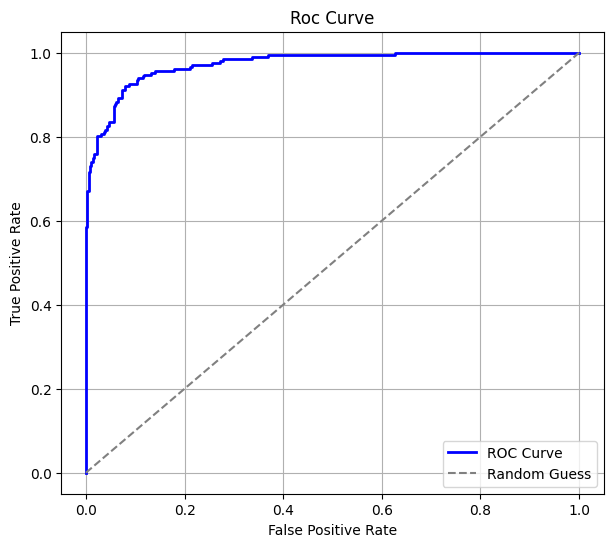

In [12]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_proba = model_lor.predict_proba(X)[:, 1]

fpr, tpr, thresholds = roc_curve(y, y_proba)

plt.figure(figsize = (7,6))
plt.plot(fpr, tpr, color ='blue', lw=2, label='ROC Curve')
plt.plot([0,1], [0,1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**ROC AUC 값을 구하고 해당 값을 통해 알 수 있는 점을 쓰시오.**

In [13]:
from sklearn.metrics import roc_auc_score

# 예측 확률
y_proba = model_lor.predict_proba(X)[:, 1]

# AUC 계산
auc_score = roc_auc_score(y, y_proba)
print('ROC AUC:', auc_score)

ROC AUC: 0.974076423022039


ROC AUC 값이 약 0.9741로 1에 가깝다. 즉 모델이 악성, 양성을 잘 구분할 수 있다고 생각할 수 있다.